In [1]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(tidyr)
filepath <- '/Users/cyz/survey/active_survey/'


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
dataset <- 'cces16_rank8'
cur_rank <- 8
cur_alpha <- 1
cur_completer <- 'bpmf'
cur_vmethod <- 'row-norm'

In [3]:
source('eval_util.R')

In [4]:
results <- read_results(dataset) %>% filter(strategy != 'epsilon_greedy')
get_sample_sizes(results)

eval_method,completer,strategy,rank,v_method,optimality,alpha,n
sparsify,bpmf,active,8,row-norm,A,1,10
sparsify,bpmf,random,8,row-norm,A,1,10
sparsify,bpmf,sequential,8,row-norm,A,1,10


In [5]:
strategy_colors <- c('random'='black', 'active'='red', 'sequential'='blue')

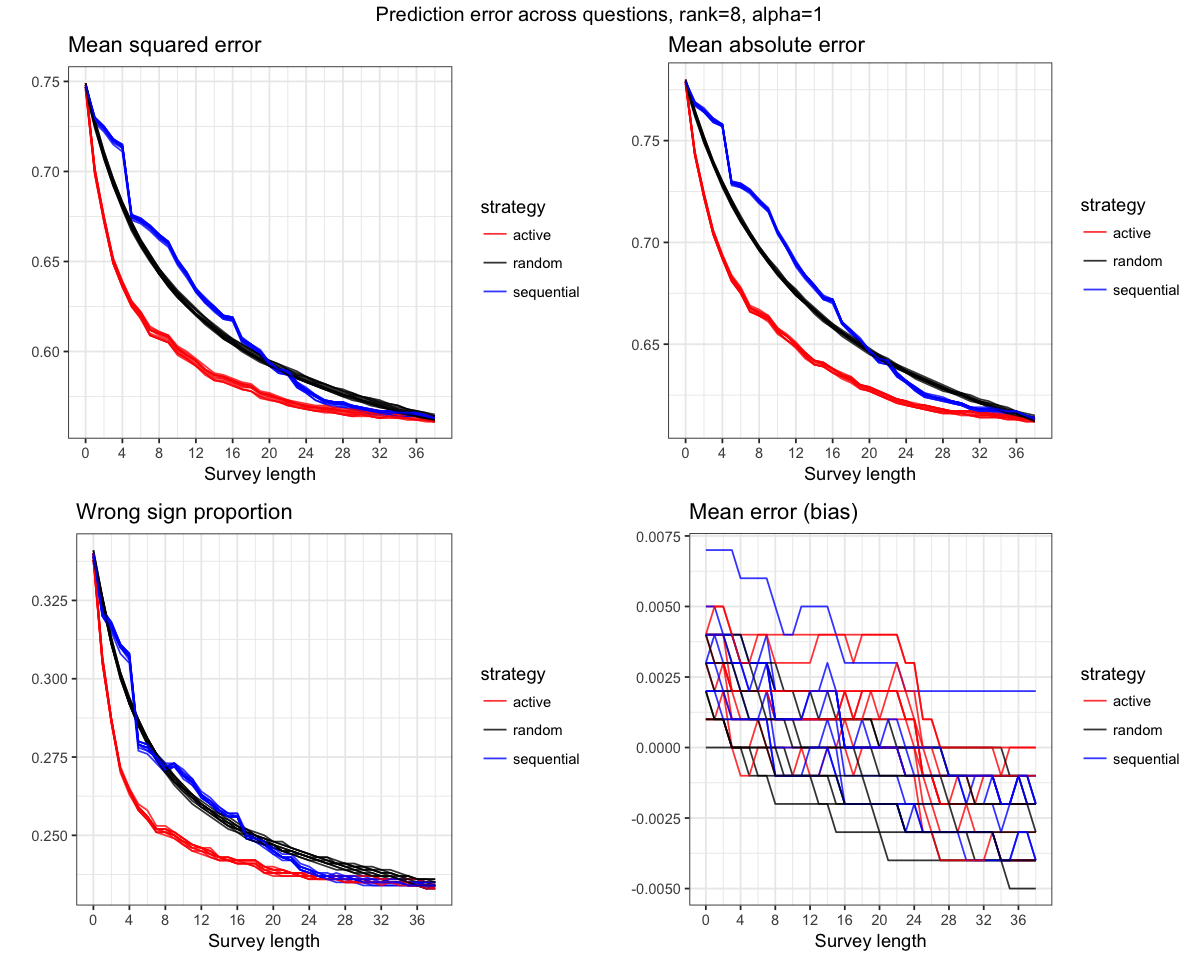

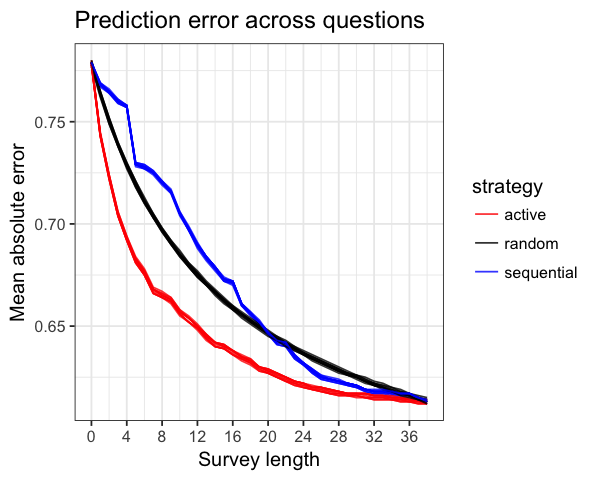

In [6]:
plot_aggregate_error(optimality_type='A')
plot_aggregate_error(optimality_type='A', metric='mae')

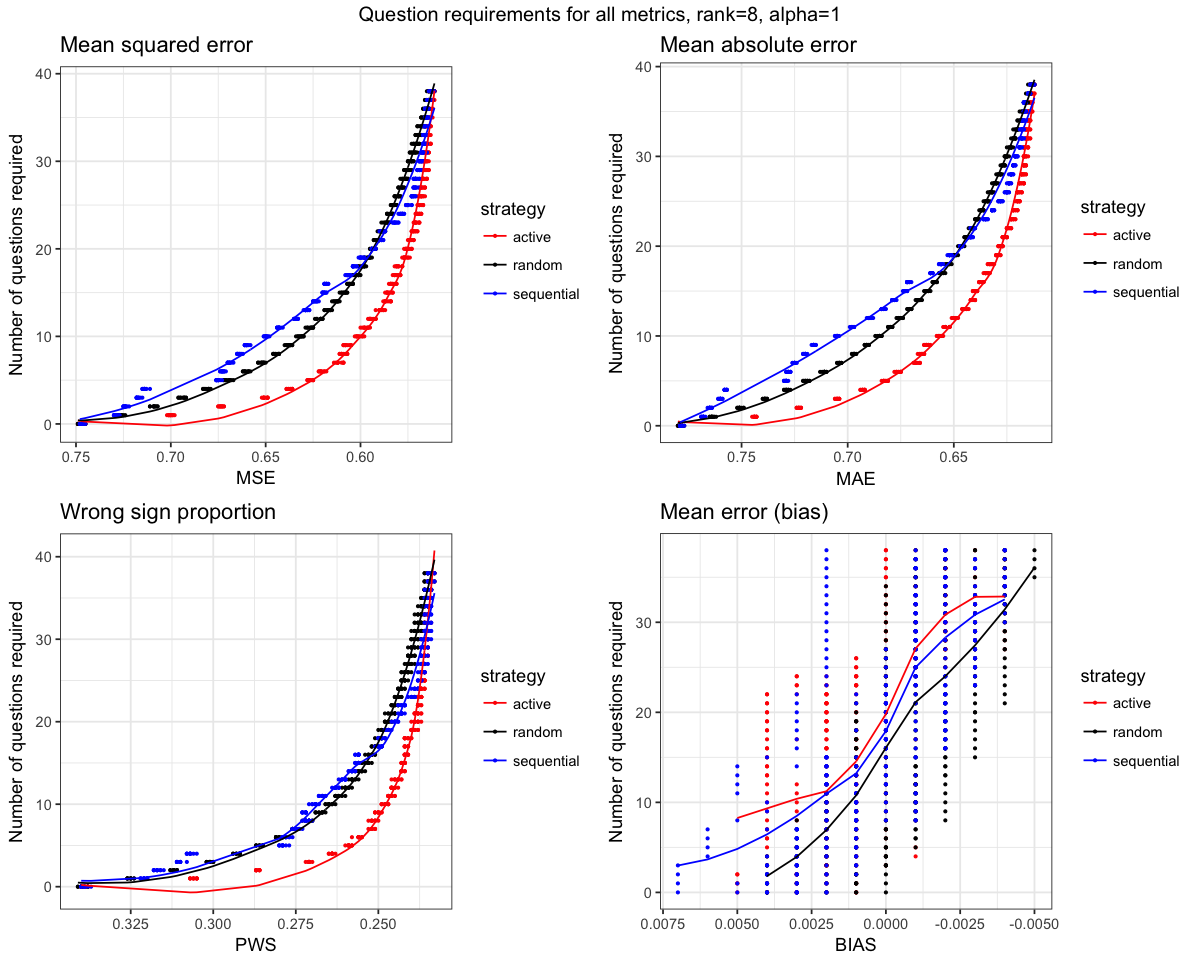

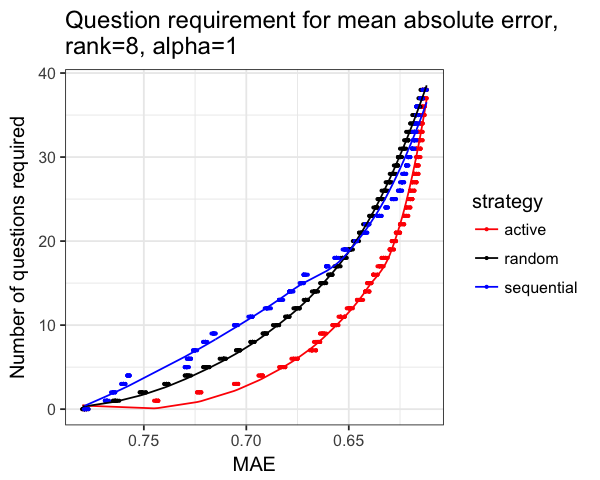

In [7]:
plot_aggregate_error_inverse(optimality_type='A')
plot_aggregate_error_inverse(optimality_type='A', metric='mae')

Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

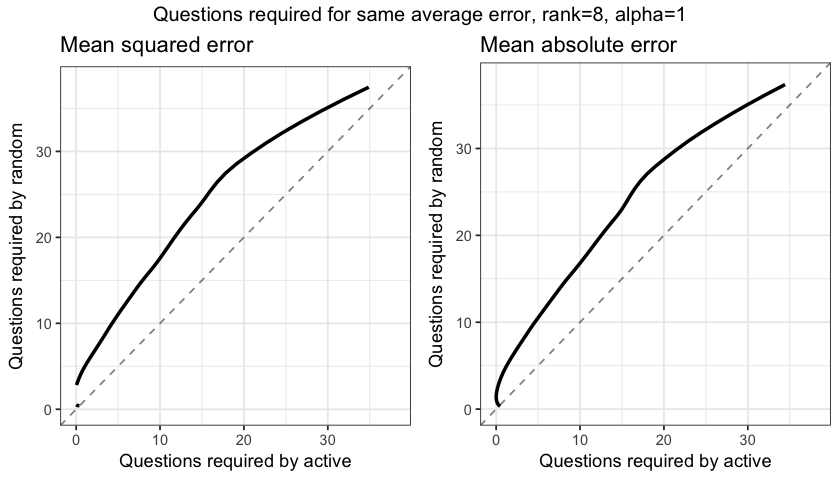

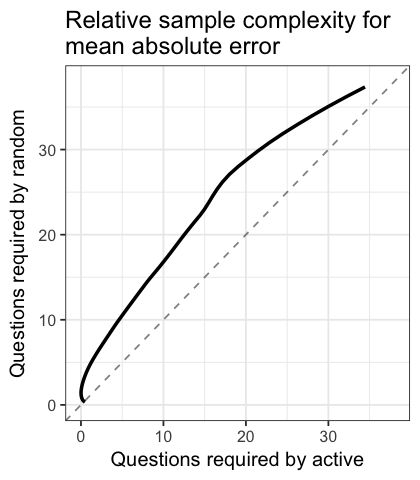

In [8]:
plot_method_comparison(optimality_type='A', base_method='active', compare_method='random')
plot_method_comparison(optimality_type='A', base_method='active', compare_method='random', metric='mae')

In [9]:
# plot_per_question_error(optimality_type='A')

In [10]:
# plot_aggregate_error(optimality_type='D')
# plot_aggregate_error(optimality_type='D', metric='mae')

In [11]:
# plot_aggregate_error(optimality_type='E')
# plot_aggregate_error(optimality_type='E', metric='mae')

Warning message:
“Column `columns`/`question` joining factors with different levels, coercing to character vector”Warning message in min(combined_df$yvar - 2 * combined_df$se):
“no non-missing arguments to min; returning Inf”Warning message in max(combined_df$yvar + 2 * combined_df$se):
“no non-missing arguments to max; returning -Inf”

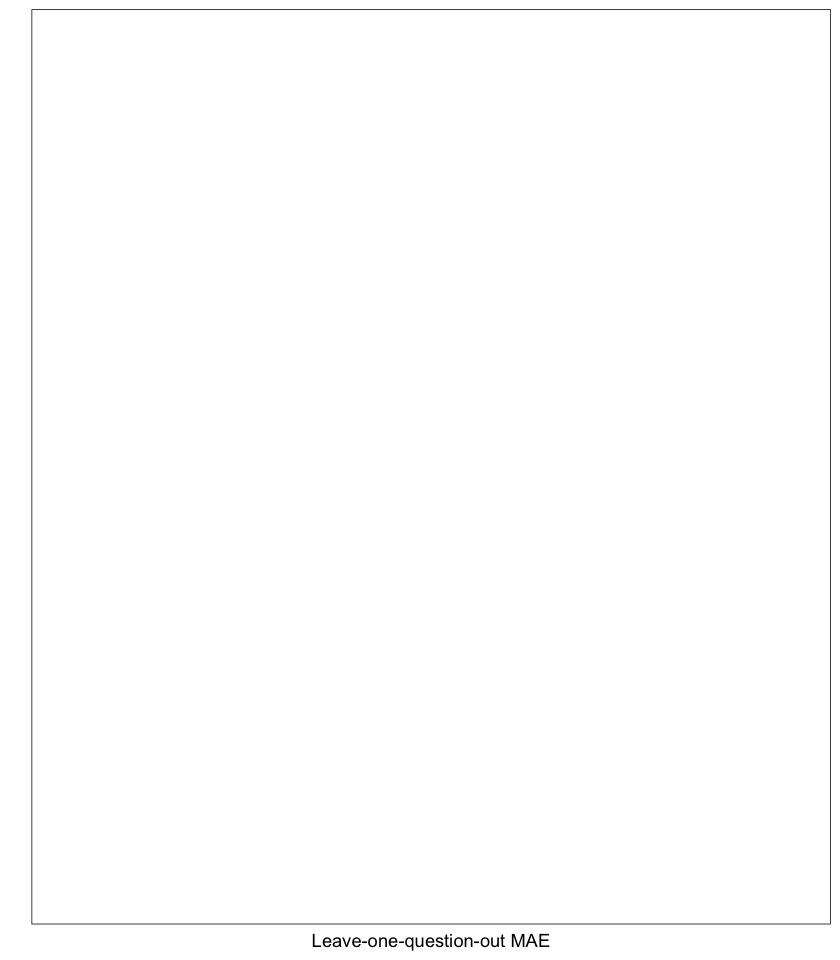

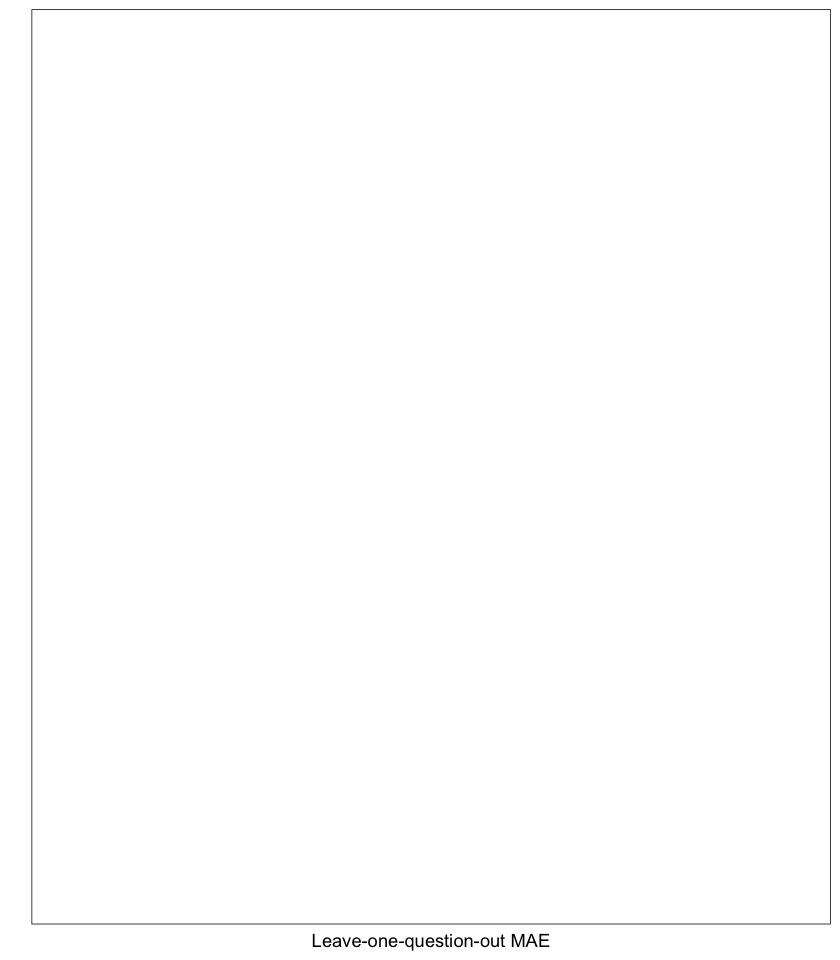

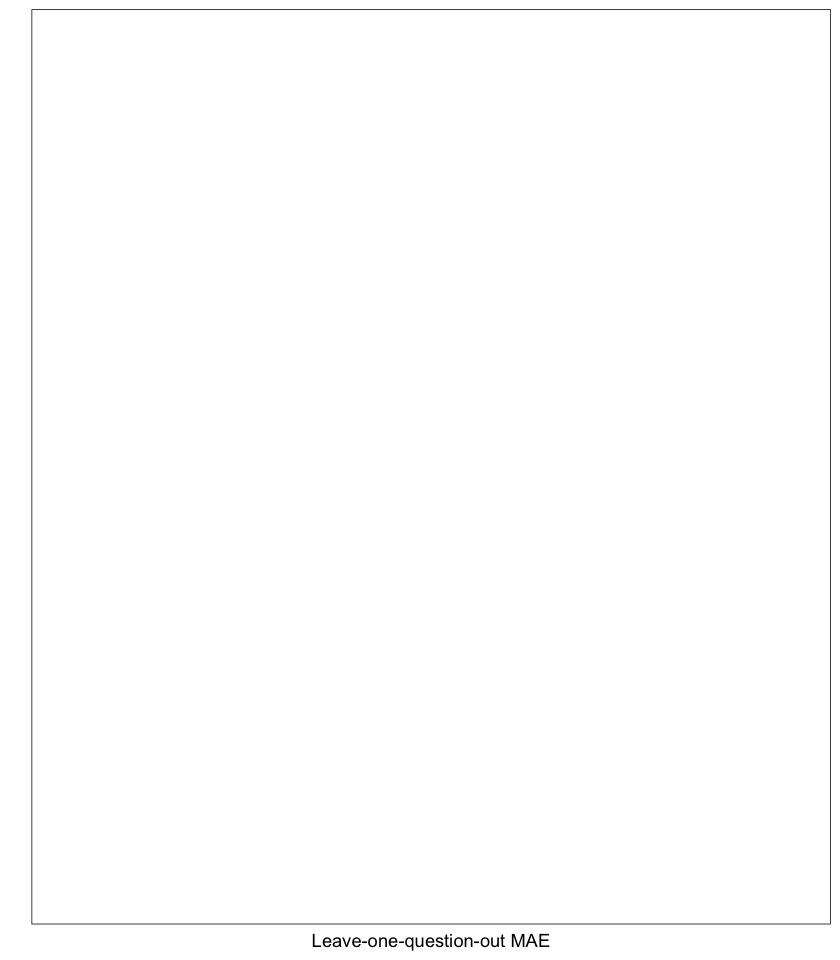

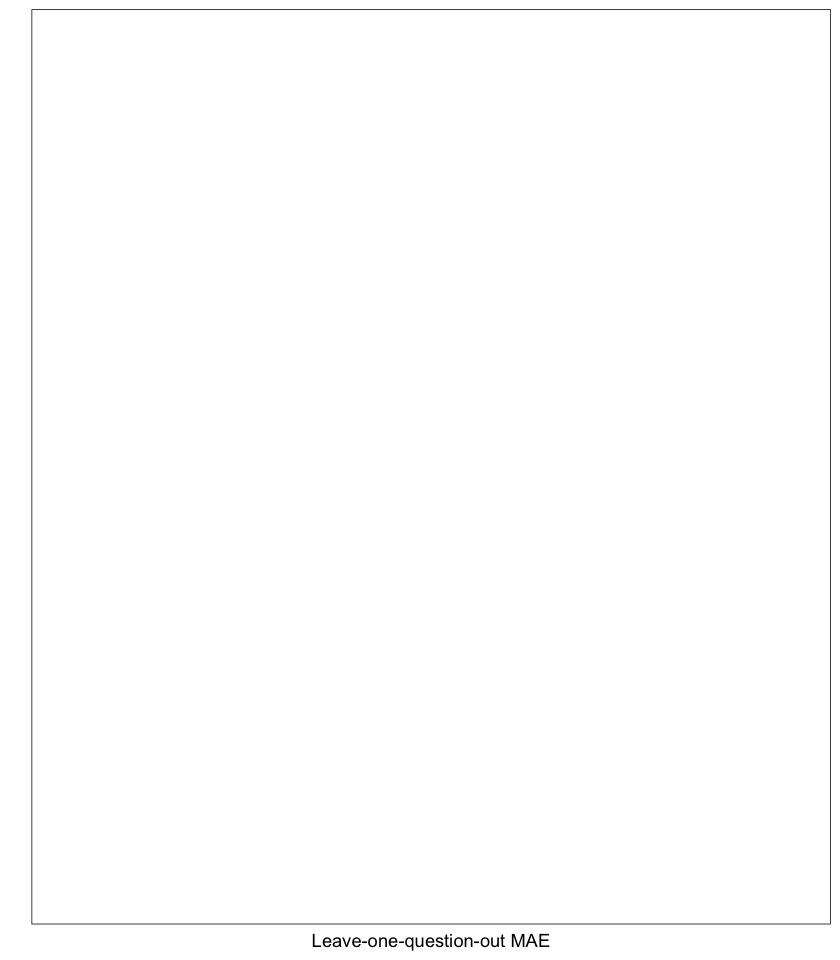

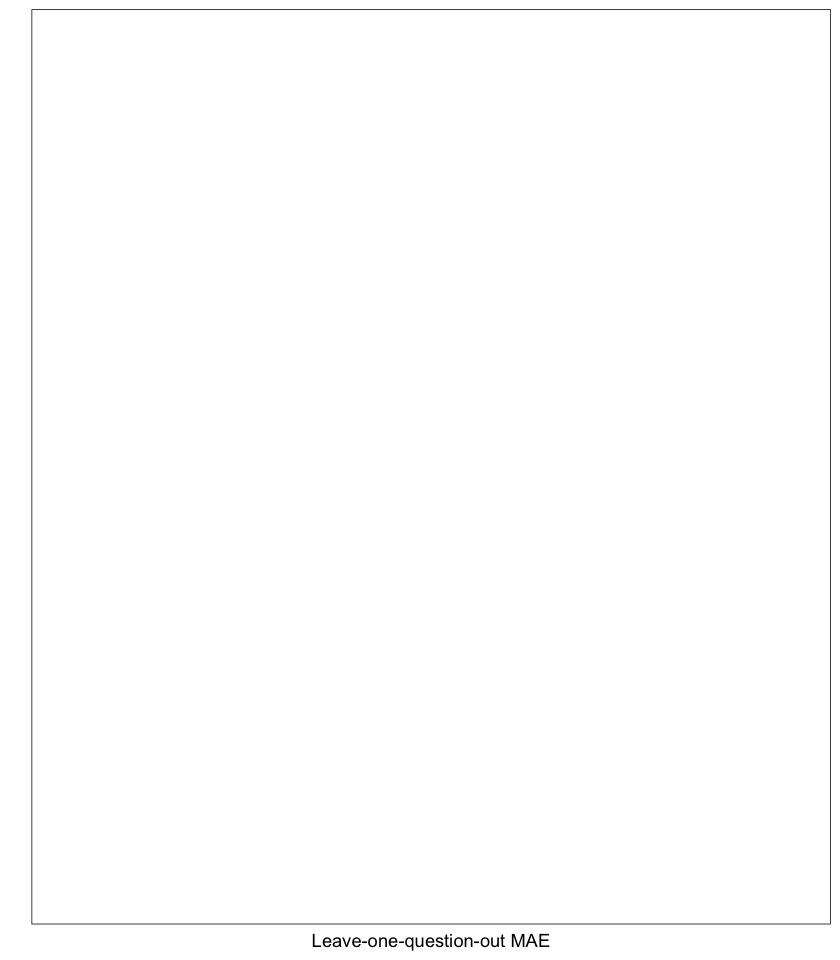

Warning message:
“Column `columns`/`question` joining factors with different levels, coercing to character vector”Warning message in min(combined_df$yvar - 2 * combined_df$se):
“no non-missing arguments to min; returning Inf”Warning message in max(combined_df$yvar + 2 * combined_df$se):
“no non-missing arguments to max; returning -Inf”

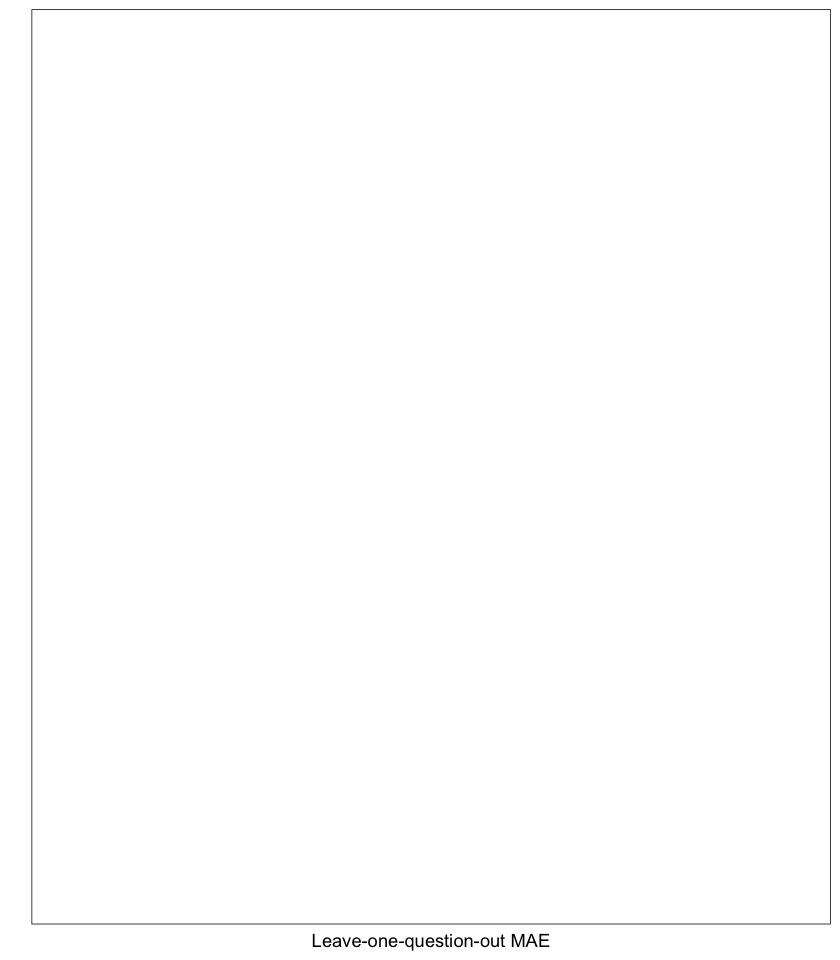

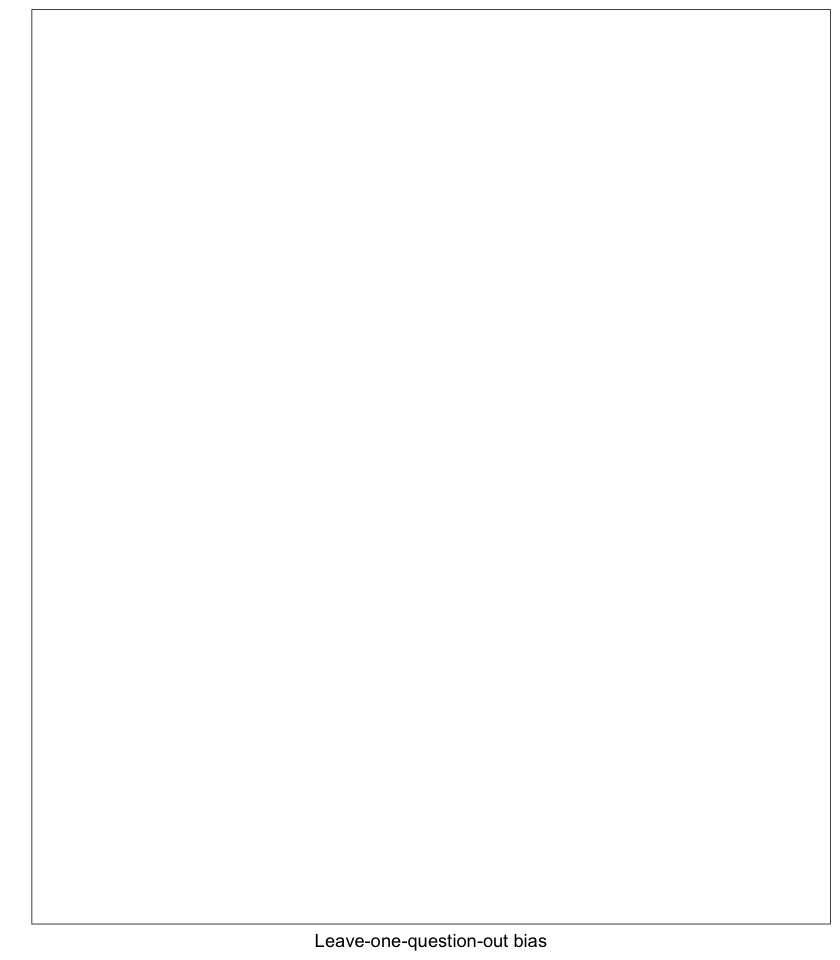

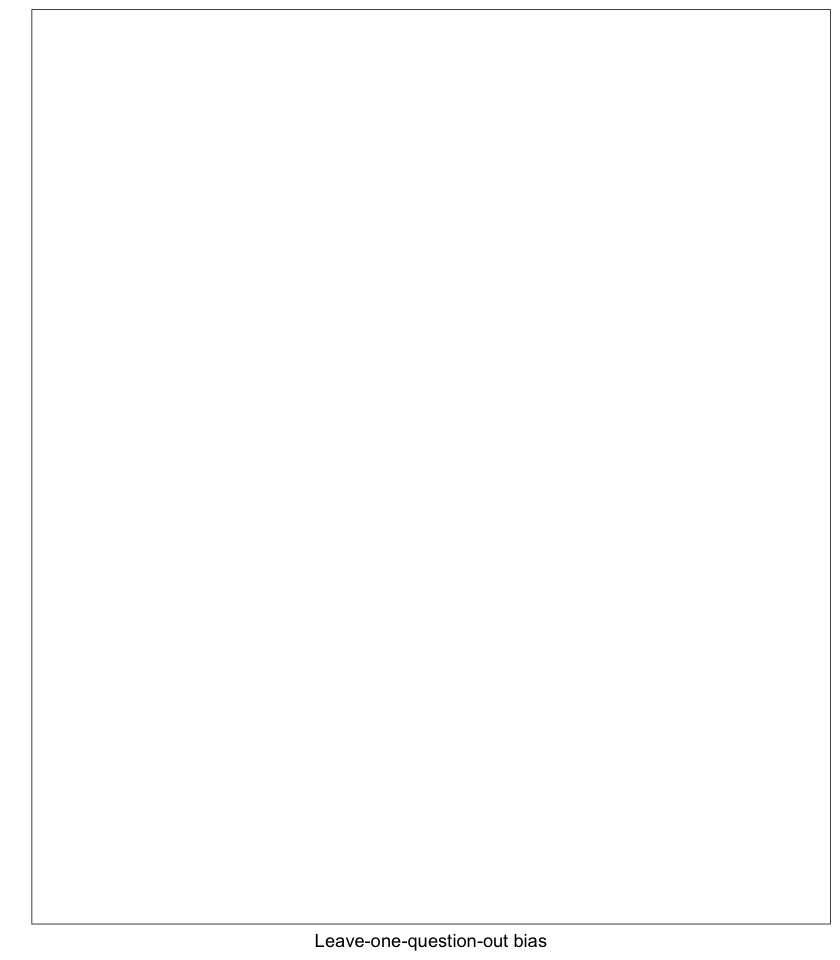

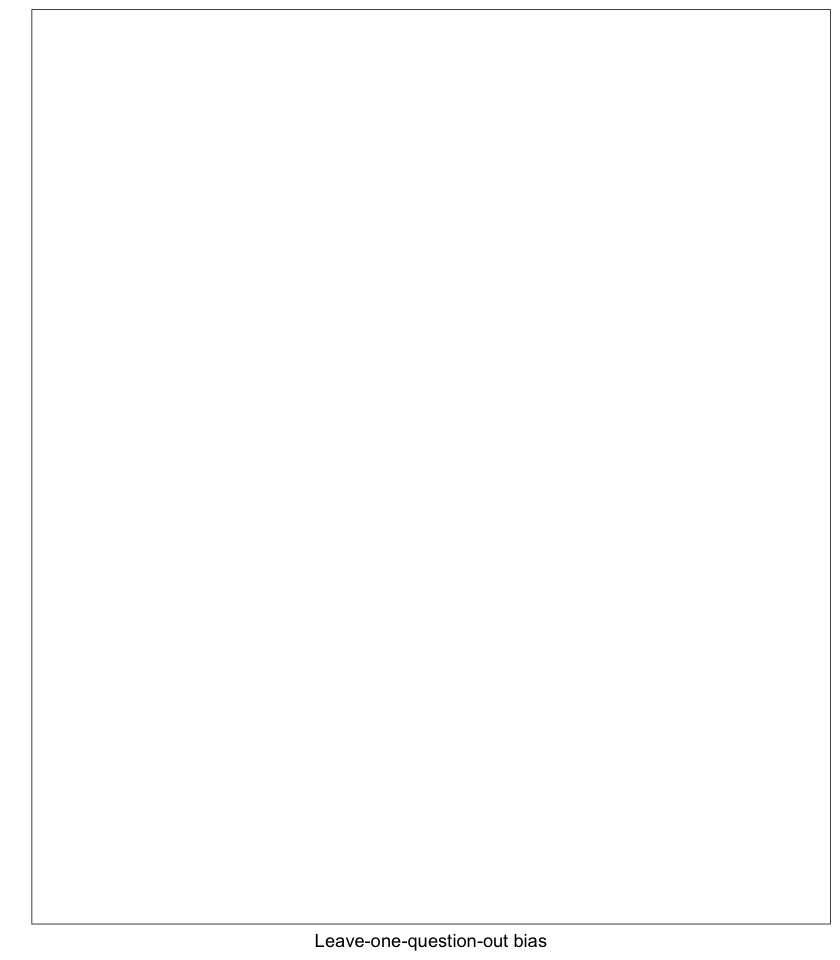

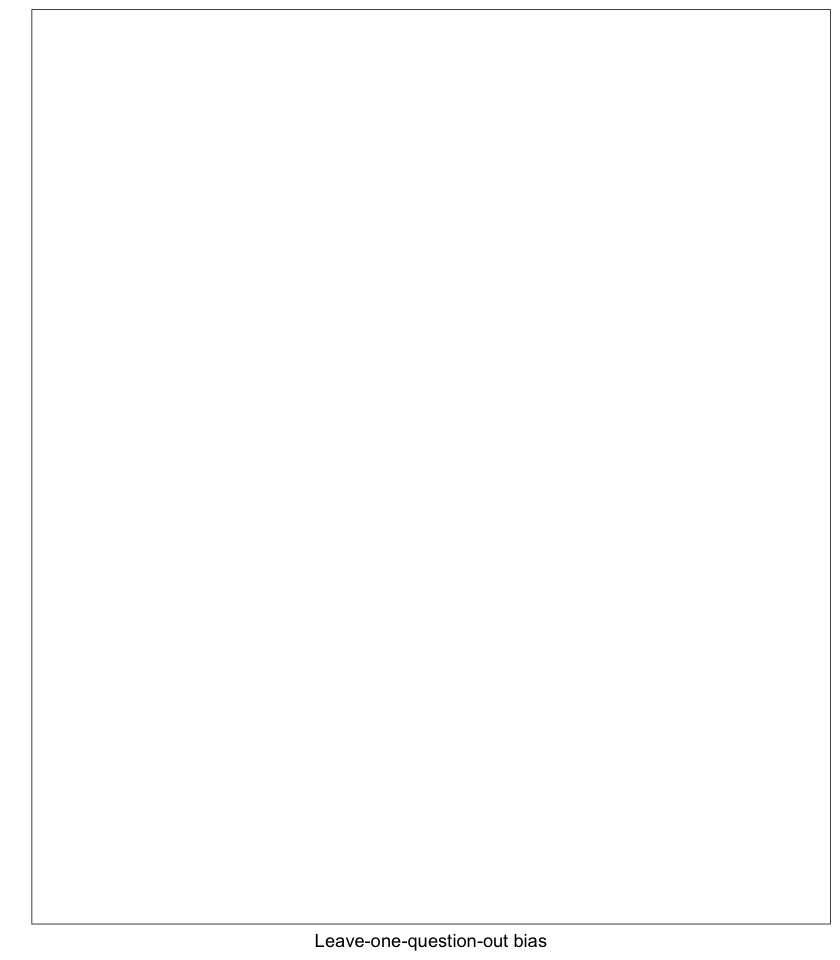

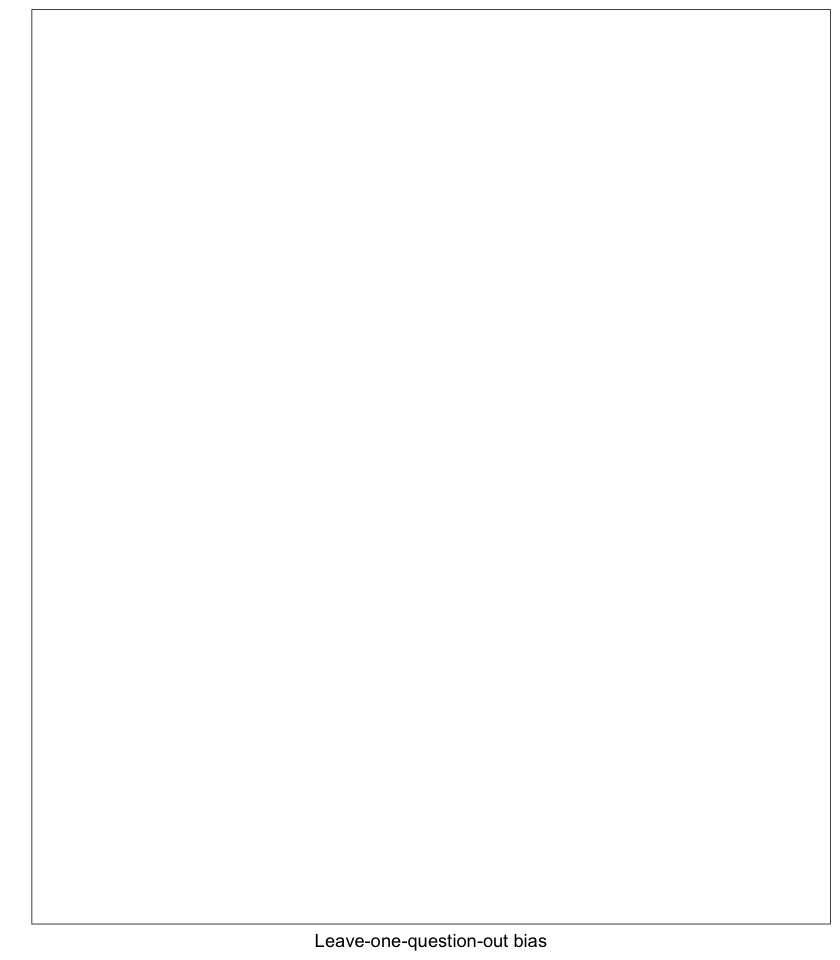

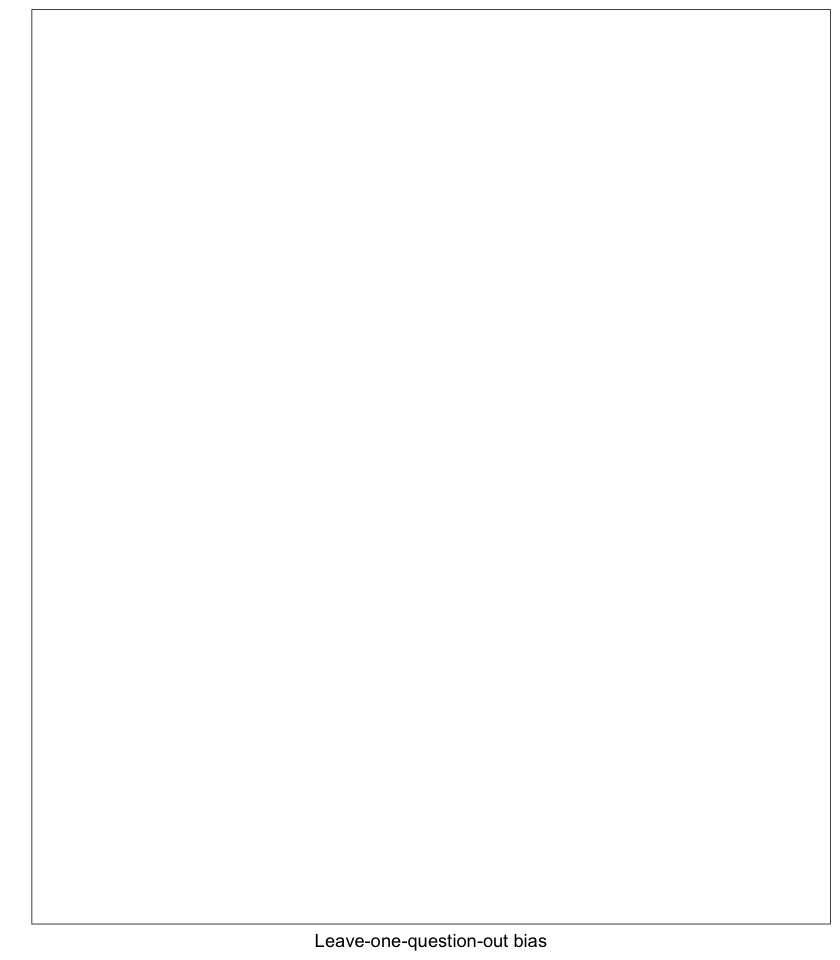

In [12]:
question_df <- read.csv(paste0(filepath, 'data/cces/cces16_questions_short.csv'), stringsAsFactors = T)
plot_per_question_comparison(y_var='mae', sd_var='sdae', y_var_readable='MAE', question_df=question_df)
plot_per_question_comparison(y_var='bias', y_var_readable='bias', question_df=question_df)

In [13]:
base_method = 'random'
compare_method = 'active'
plot_error_diff(optimality_type='A', base_method=base_method, compare_method=compare_method, y_var='mae', show_max_qnum=20)
plot_error_diff(optimality_type='A', base_method=base_method, compare_method=compare_method, y_var='mae', show_max_qnum=20, plot_error_diff_fn=plot_error_diff_box)
plot_effect_size(optimality_type='A', base_method=base_method, compare_method=compare_method, y_var='mae', sd_var='sdae', show_max_qnum=20)
plot_effect_size(optimality_type='A', base_method=base_method, compare_method=compare_method, y_var='mae', sd_var='sdae', show_max_qnum=20, plot_error_diff_fn=plot_error_diff_box)


ERROR: Error in mutate_impl(.data, dots): Binding not found: random.


In [ ]:
# Is there any relationship between MAE and bias? Compare oracle errors
compare_oracle_mae_bias <- function() {
    cur_eval_method <- 'lococv'
    
    cur_results <- results %>% 
        filter(eval_method == cur_eval_method &
               rank == cur_rank & 
               alpha == cur_alpha & 
               v_method == cur_vmethod)
    
    oracle_df <- cur_results %>%
        filter(qnum == max(cur_results$qnum) & completer == 'bpmf' & strategy == 'random') %>%
        select(columns, mae, bias) %>% 
        mutate(bias_abs = abs(bias), bias_sq = bias^2)
    
    print(cor(oracle_df$mae, oracle_df$bias))
    print(cor(oracle_df$mae, oracle_df$bias_abs))
    plot(oracle_df$bias, oracle_df$mae, xlab='Oracle bias', ylab='Oracle MAE')
    plot(oracle_df$bias_abs, oracle_df$mae, xlab='Oracle bias (absolute value)', ylab='Oracle MAE')
    lm(oracle_df$mae ~ oracle_df$bias_abs) %>% summary()    
}

# compare_oracle_mae_bias()

In [ ]:
error_reduction_results <- plot_error_reduction_all(y_var='mae')